In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r'/content/crypto_sentiment_prediction_dataset.csv')
df

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2025-07-04 17:16:03,Cardano,0.4492,-4.66,6345791.01,8.185563e+09,0.327,0.009,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.33,590629.81,2.546980e+13,-0.277,-0.143,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,11.93,24276229.78,1.224982e+11,0.216,0.001,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-7.76,2126227.67,2.240884e+10,0.144,0.160,2.32,202,66.3,76.2,37.6,74.8


In [5]:
df.rename(columns={'timestamp':'Timestamp','cryptocurrency':'Cryptocurrency'})

,Timestamp,Cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2025-07-04 17:16:03,Cardano,0.4492,-4.66,6345791.01,8.185563e+09,0.327,0.009,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.33,590629.81,2.546980e+13,-0.277,-0.143,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,11.93,24276229.78,1.224982e+11,0.216,0.001,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-7.76,2126227.67,2.240884e+10,0.144,0.160,2.32,202,66.3,76.2,37.6,74.8


In [6]:
df.shape

(2063, 14)

In [8]:
df.describe()

,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000
max,51610.923200,27.080000,1.402925e+08,1.009556e+15,1.000000,1.000000,9.530000,35578.000000,100.000000,100.000000,97.100000,100.000000


In [9]:
df.isnull().sum()

,0
timestamp,0
cryptocurrency,0
current_price_usd,0
price_change_24h_percent,0
trading_volume_24h,0
market_cap_usd,0
social_sentiment_score,0
news_sentiment_score,0
news_impact_score,0
social_mentions_count,0


In [10]:
df

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2025-07-04 17:16:03,Cardano,0.4492,-4.66,6345791.01,8.185563e+09,0.327,0.009,2.54,1695,56.5,77.3,51.9,72.4
2059,2025-07-04 17:25:39,Ethereum,3077.3009,0.33,590629.81,2.546980e+13,-0.277,-0.143,2.31,1093,40.1,30.4,40.5,79.2
2060,2025-07-04 17:43:50,Polkadot,8.1297,11.93,24276229.78,1.224982e+11,0.216,0.001,3.07,401,51.7,93.3,41.6,71.0
2061,2025-07-04 19:31:59,Polygon,1.1212,-7.76,2126227.67,2.240884e+10,0.144,0.160,2.32,202,66.3,76.2,37.6,74.8


<function matplotlib.pyplot.show(close=None, block=None)>

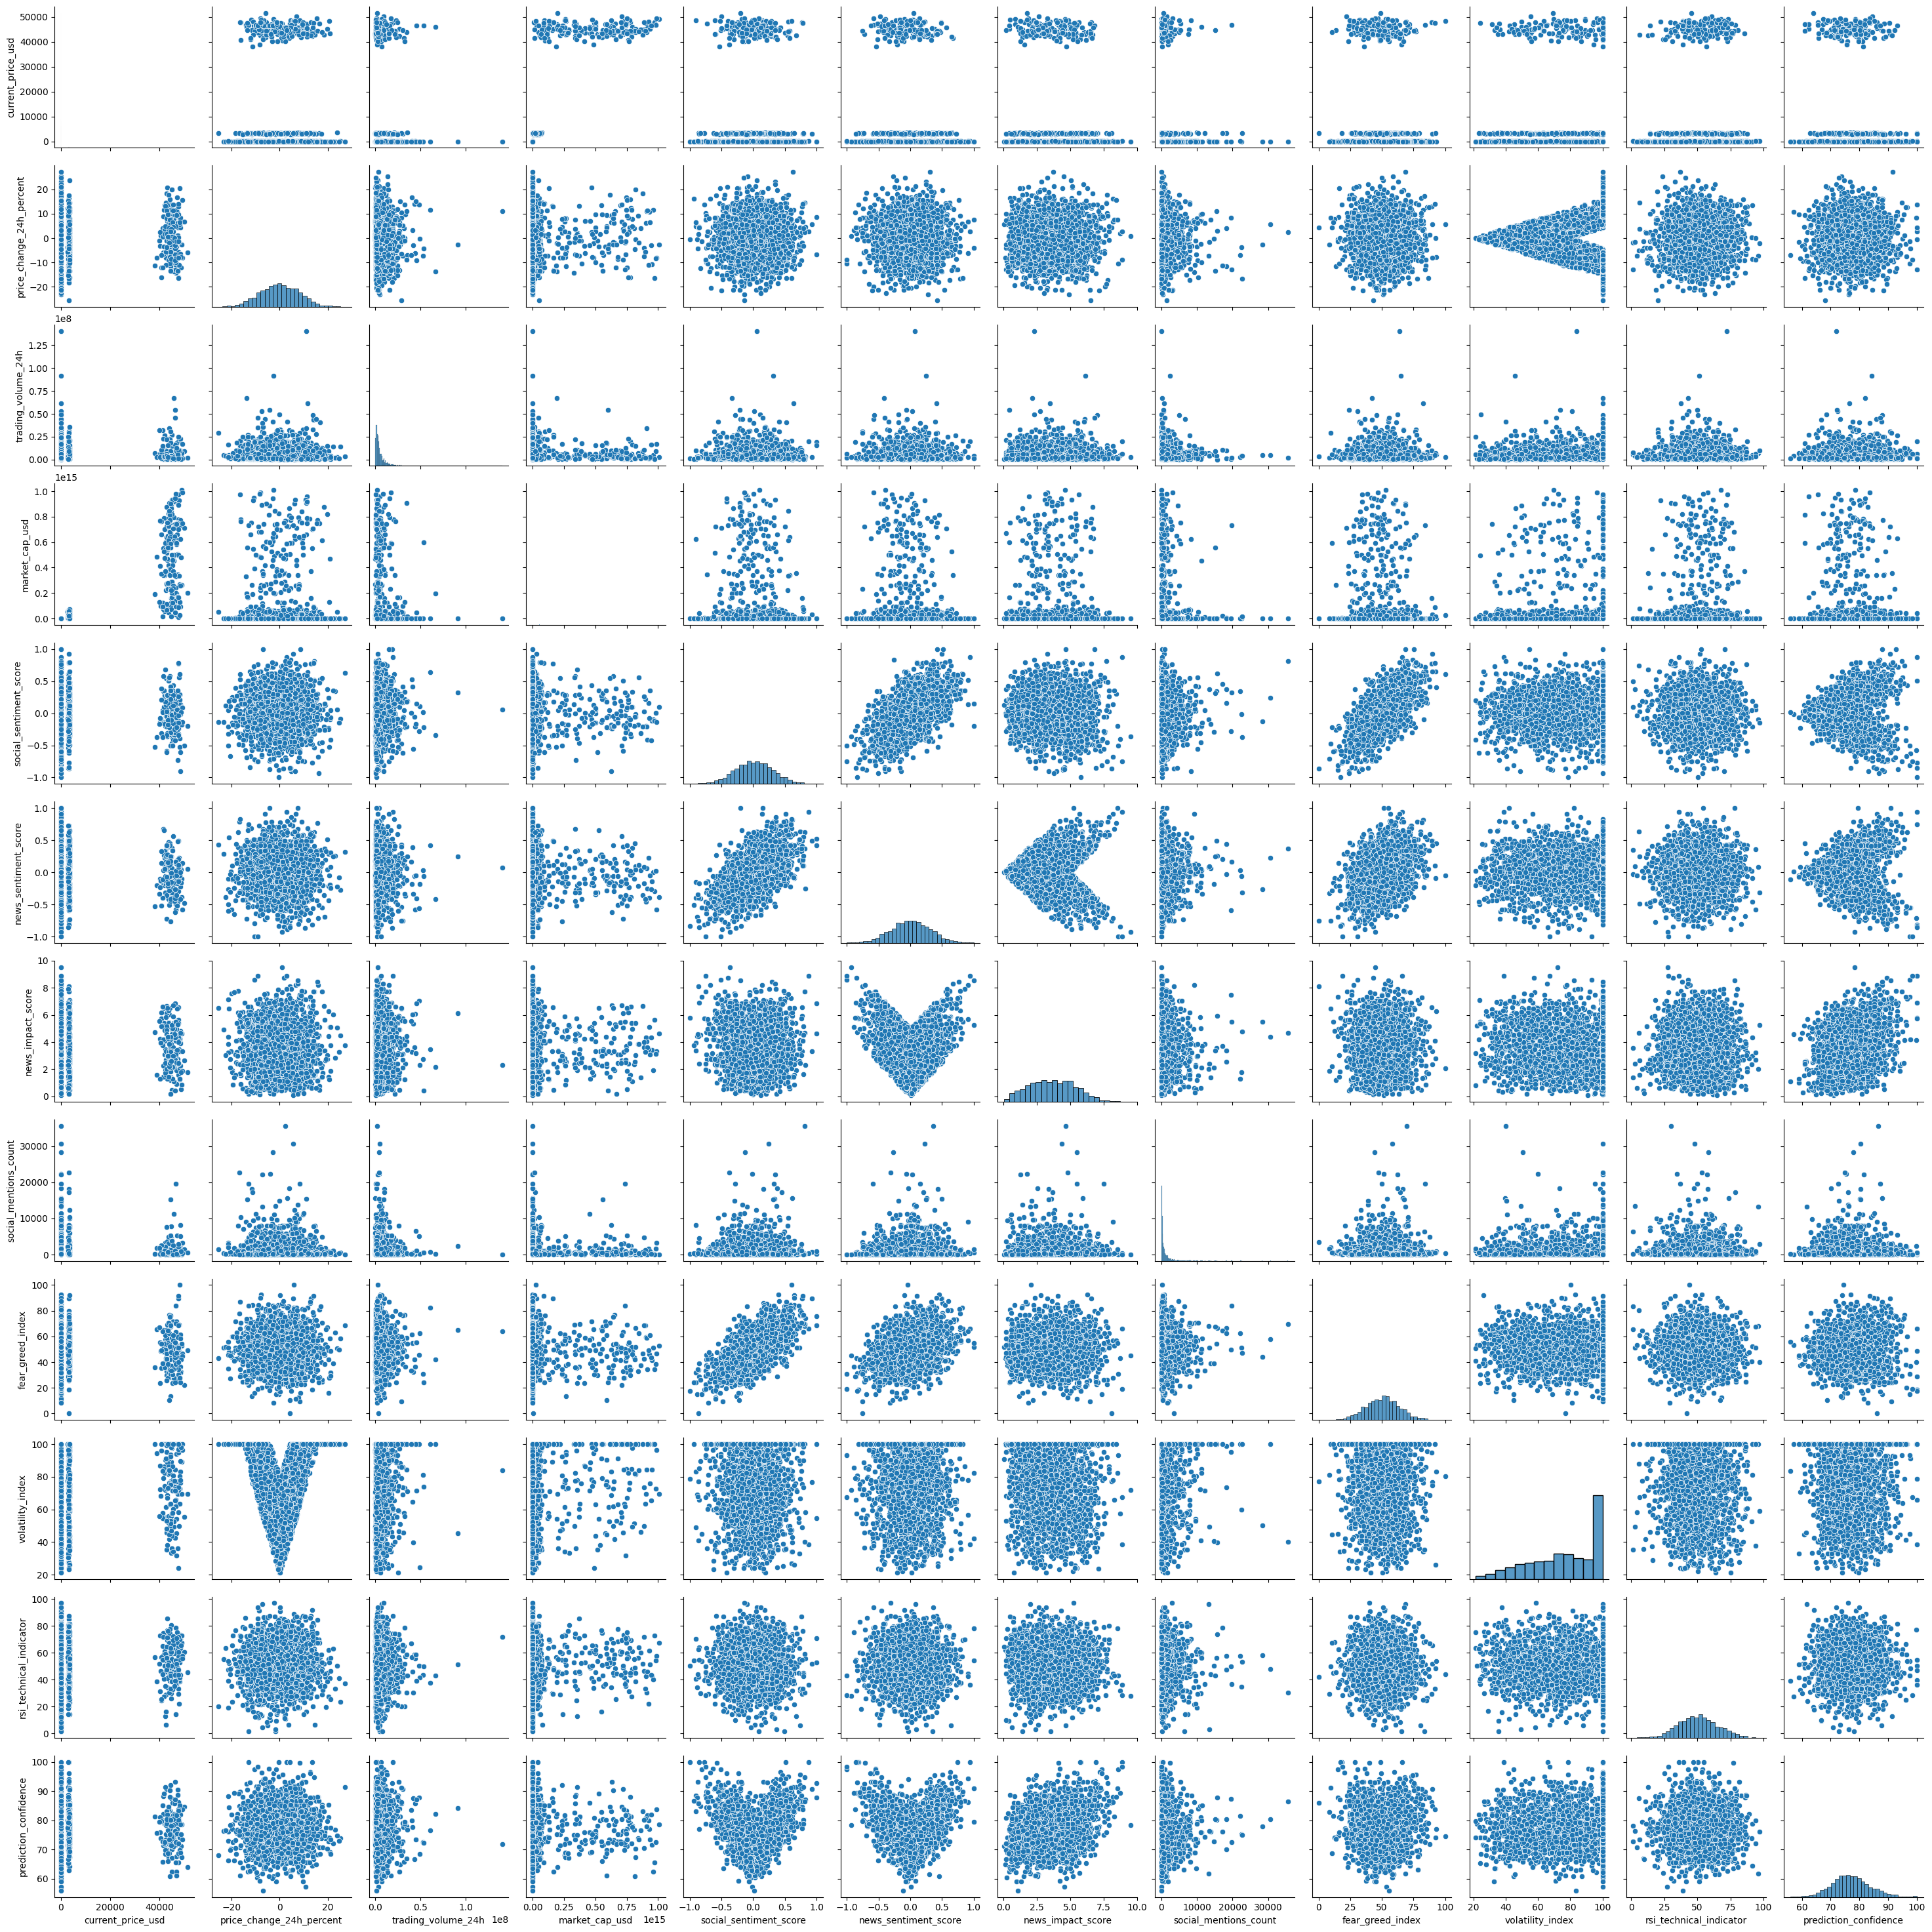

In [12]:
sns.pairplot(df)
plt.show

In [13]:
y=df['prediction_confidence']
y

,prediction_confidence
0,78.1
1,66.7
2,77.4
3,81.7
4,81.8
...,...
2058,72.4
2059,79.2
2060,71.0
2061,74.8


In [16]:
import sklearn.cluster as cluster
kmeans= cluster.KMeans(n_clusters=8)
kmeans=kmeans.fit(df[['prediction_confidence','volatility_index']])
kmeans.cluster_centers_


array([[72.36767677, 98.98813131],
       [77.50153257, 62.03180077],
       [77.4619883 , 34.90584795],
       [85.19310345, 76.45287356],
       [83.41967742, 98.48096774],
       [72.65119048, 73.86428571],
       [76.70806452, 49.62298387],
       [75.53266932, 85.97091633]])

In [19]:
df['cluster']=kmeans.labels_


In [20]:
df['cluster']

,cluster
0,4
1,5
2,1
3,4
4,1
...,...
2058,5
2059,2
2060,0
2061,5


In [21]:
df.head(15)

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence,cluster
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1,4
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7,5
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4,1
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7,4
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8,1
5,2025-06-04 22:39:07,Polkadot,7.2521,-4.11,2631031.62,6.252717e+10,0.057,0.147,3.39,387,56.2,98.8,35.3,81.7,4
6,2025-06-04 23:07:46,Polkadot,7.6604,-2.89,958183.80,1.357649e+11,-0.046,-0.244,6.14,1326,57.7,39.0,56.1,75.7,2
7,2025-06-04 23:15:29,Solana,77.7702,-11.79,5560303.82,1.582158e+12,0.079,0.064,0.87,328,55.5,99.0,53.2,71.3,0
8,2025-06-04 23:26:40,Bitcoin,47418.4096,1.05,1800434.38,3.437553e+14,-0.728,-0.274,2.73,707,35.3,36.0,58.3,88.7,2
9,2025-06-04 23:55:18,Avalanche,35.9923,-3.41,910727.30,8.942665e+10,0.724,0.455,4.02,679,66.3,52.1,53.0,93.4,6


In [22]:
df['cluster'].value_counts()

,count
cluster,
0,396
4,310
1,265
5,252
7,251
6,244
3,174
2,171


<Axes: xlabel='cryptocurrency', ylabel='prediction_confidence'>

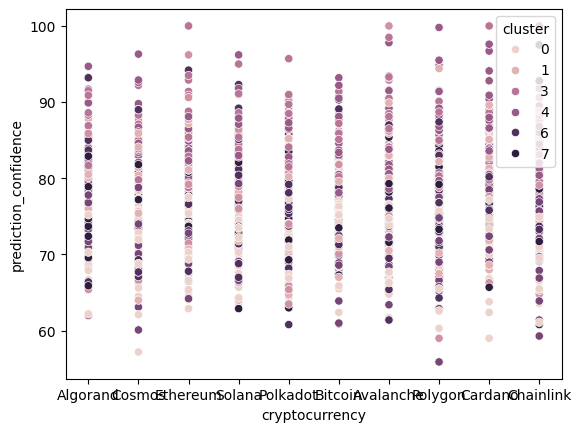

In [24]:
sns.scatterplot(x='cryptocurrency',y='prediction_confidence',hue='cluster',data=df)

In [27]:
from sklearn.cluster import KMeans

In [36]:
K_range = range(1,20)
wcss=[]
for k in K_range:
  kmeans=KMeans(n_clusters=k)
  kmeans=kmeans.fit(df[['prediction_confidence','volatility_index']])
  wcss.append(kmeans.inertia_)


In [38]:
wcss = []

In [39]:
for k in K_range:
  kmeans=KMeans(n_clusters=k)
  kmeans=kmeans.fit(df[['prediction_confidence','volatility_index']])
  wcss.append(kmeans.inertia_)

In [40]:
wcss

[1021974.8246146388,
 336285.6696885314,
 188503.76908742764,
 144428.16855208203,
 121774.27626031304,
 103503.52981119632,
 89952.70604753318,
 79063.16077542625,
 73424.19085059245,
 64411.93013878679,
 58669.89279550151,
 55191.07975610671,
 50966.57375415307,
 48227.21680372667,
 43186.08892064102,
 40966.184039043634,
 38208.16687895564,
 36454.82768741942,
 33478.18376614294]

Text(0.5, 1.0, 'Elbow method')

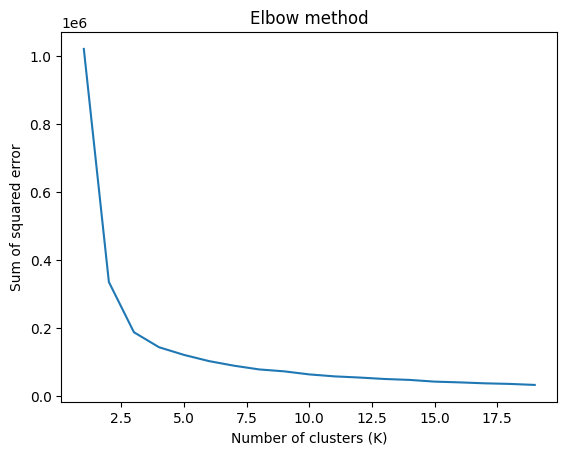

In [41]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss)
plt.title('Elbow method')

In [42]:
k_range = range(1,20)
wcss2=[]

In [47]:
for k in k_range:
  KM = KMeans(n_clusters=k)
  KM.fit(df[['cluster']])
  wcss2.append(KM.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [48]:
wcss2

[12113.210857973838,
 2626.1163887065313,
 1120.597586534413,
 718.3784285421775,
 348.9722895049806,
 235.41402292721972,
 103.93348623853153,
 1.6252388470680113e-25,
 1.5930631828963092e-25,
 1.6252388470680113e-25,
 1.6252388470680113e-25,
 1.5930631828963092e-25,
 1.5618775391606596e-25,
 1.5618775391606596e-25,
 1.5930631828963092e-25,
 1.5618775391606596e-25,
 1.5930631828963092e-25,
 1.5930631828963092e-25,
 1.5930631828963092e-25]

In [51]:
kmeans2 = cluster.KMeans(n_clusters = 4)
kmeans2 = kmeans2.fit(df[['cluster']])
kmeans2.cluster_centers_

array([[6.50707071e+00],
       [1.39220183e+00],
       [4.10597826e+00],
       [7.99360578e-15]])

In [52]:
df['age_clusters'] = kmeans2.labels_

In [53]:
df['age_clusters'].value_counts()

,count
age_clusters,
2,736
0,495
1,436
3,396


<Axes: xlabel='volatility_index', ylabel='prediction_confidence'>

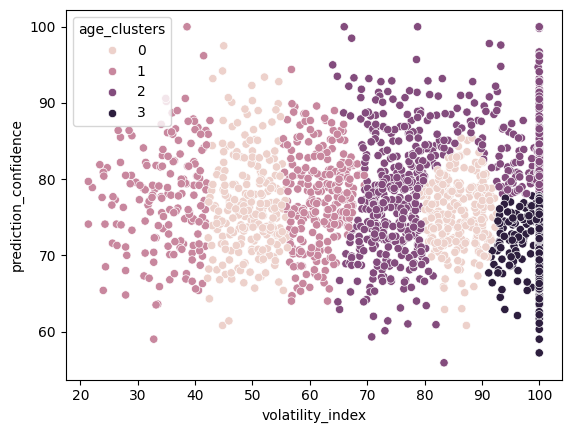

In [56]:
sns.scatterplot(x='volatility_index', y='prediction_confidence',hue='age_clusters',data=df)